In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')

classifiers = {}

# Dataset

In [2]:
data = pd.read_csv("dataset_modified.csv")
data.head(10) 

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,0,25.19,6.6,140,0
1,1,28.0,0,0,0,27.32,5.7,158,0
2,0,36.0,0,0,3,23.45,5.0,155,0
3,1,76.0,1,1,3,20.14,4.8,155,0
4,0,20.0,0,0,0,27.32,6.6,85,0
5,0,44.0,0,0,0,19.31,6.5,200,1
6,1,42.0,0,0,0,33.64,4.8,145,0
7,0,32.0,0,0,0,27.32,5.0,100,0
8,0,53.0,0,0,0,27.32,6.1,85,0
9,0,54.0,0,0,2,54.70,6.0,100,0


# Basic EDA

Checking if the features are independent

<Axes: >

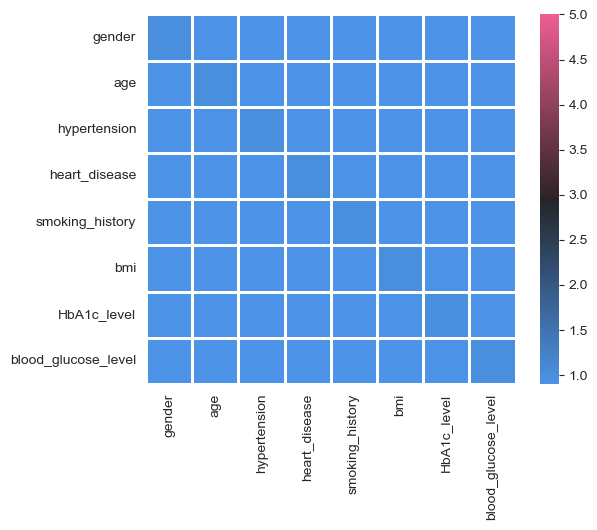

In [3]:
corr = data.iloc[:,:-1].corr(method="pearson")
cmap = sns.diverging_palette(250,354,80,60,center="dark",as_cmap=True)
sns.heatmap(corr,vmax=1,vmin=5, cmap=cmap, square = True, linewidth=2)

This shows that all features are independent to each other

<Axes: xlabel='heart_disease', ylabel='Count'>

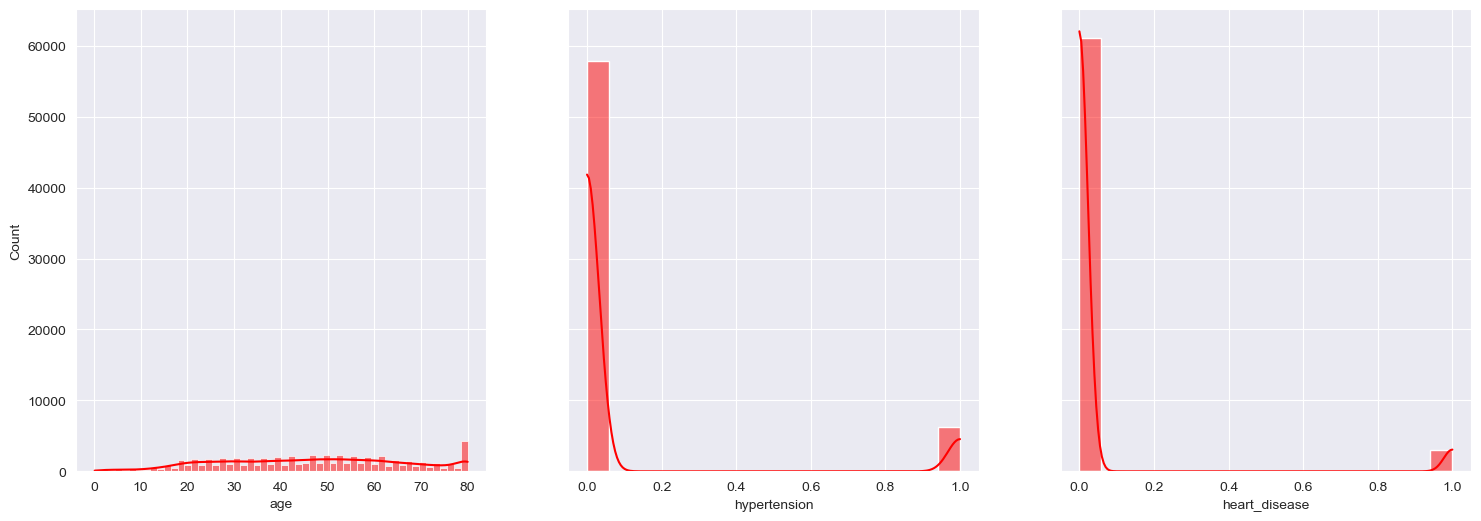

In [4]:
fig, axes = plt.subplots(1,3, figsize=(18,6), sharey=True)
sns.histplot(data, ax=axes[0], x="age", kde=True, color="r")
sns.histplot(data, ax=axes[1], x="hypertension", kde=True, color="r")
sns.histplot(data, ax=axes[2], x="heart_disease", kde=True, color="r")

<Axes: xlabel='blood_glucose_level', ylabel='Count'>

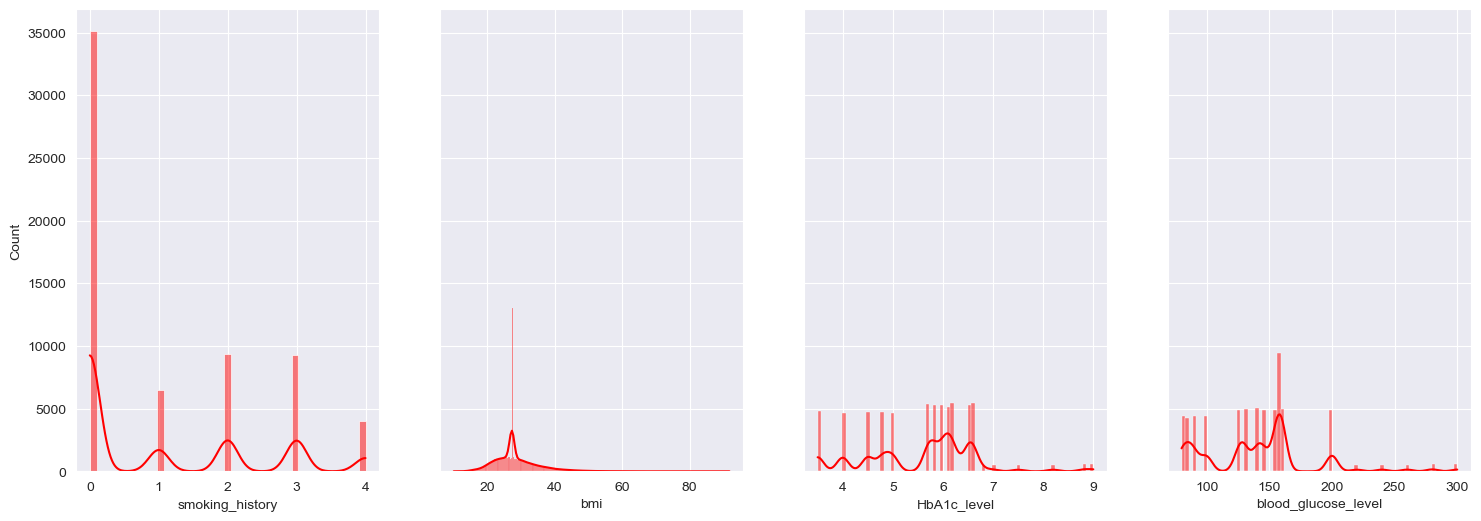

In [5]:
fig, axes = plt.subplots(1,4, figsize=(18,6), sharey=True)
sns.histplot(data, ax=axes[0], x="smoking_history", kde=True, color="r")
sns.histplot(data, ax=axes[1], x="bmi", kde=True, color="r")
sns.histplot(data, ax=axes[2], x="HbA1c_level", kde=True, color="r")
sns.histplot(data, ax=axes[3], x="blood_glucose_level", kde=True, color="r")

Not normally distributed

# Using the Defenition of Naive Bayes from the Course Pack

It is important to take note of the following characteristics of the features as it would help us determine the classifiers

According to the World Health Organization (2011), the cut-off point for diagnosing Hb1Ac is 6.5% as anything lower than 6.5% would give more false results. Therefore, anything lower than 6.5 would be "non-diabetic" and anything above would be "diabetic." However, it is important to consider than some recent sources (MedicinePlus, 2022) cite the 5.5 - 6.5 area as the "pre-diabetic" stage. This would be important once we fine tune the algorithm.

https://medlineplus.gov/lab-tests/hemoglobin-a1c-hba1c-test/

https://www.ncbi.nlm.nih.gov/books/NBK304271/

According to NHBLI (n.d.) and Paul Darube (2022), a person would have a significant risk of developing diabetes if their BMI is above 30. In NHBLI's presentation, 30-40 represents a "moderate risk" of diabetes while also have a relatively large amounts of deaths due to said diabetes. In their presentation, 25 below would have "no risk" while 25-30 poses "low risk." This would be important once we can fine tune the algorithm.

https://www.healthifyme.com/blog/bmi-type-2-diabetes/

https://www.nhlbi.nih.gov/health/educational/wecan/portion/documents/BACKGROUND4.pdf

Though that the dataset does not specify what type of test the diabetes would be, we can assume that it is under random testing. In random testing for diabetes, a result of 200 milligrams per deciliter (mg/dL) would suggest diabetes (Mayo Clinic, n.d.). Thus anything lower would mean non-diabetes.

https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451

additional information

https://www.cdc.gov/diabetes/basics/getting-tested.html

https://my.clevelandclinic.org/health/diagnostics/12363-blood-glucose-test

According to the National Institute of Diabetes and Digestive and Kidney Diseases (2017), people ages 45 and above have a significant risk of developing diabetes. Therefore, it may be important to take that Dansinger (2022) and the Centers for Disease Control and Prevention (2023) state that the disease is more likely occurring in children and teens, and even to young adults. Therefore, it may be imporant to fine tune the algorithm such that young adults and children can be observed.

https://www.niddk.nih.gov/health-information/diabetes/overview/what-is-diabetes/type-2-diabetes

https://www.webmd.com/diabetes/diabetes-link-age

https://www.cdc.gov/diabetes/basics/type2.html

# Creating the Tables

## Model Version 1 (without the fine tuning assumptions)

### For Blood Glucose Levels

In [6]:
col_names = ["Yes","No","P(Yes)","P(No)"]

# Remember that a value of 200 and above would result in a favorable diabetic reading

# when index is 0 -> non-diabetic
# when index is 1 -> diabetic

row_names = ["Non-diabetic","Diabetic"]
values_nd = [0,0]
values_d = [0,0]

for index, row in data.iterrows():
    # Access row values using column names
    bool_diabetes = row['diabetes']
    glucose_level = row['blood_glucose_level']
    i = 0
    
    if glucose_level < 200:
        if bool_diabetes:
            i = 1
        values_nd[i] += 1
    else:
        if bool_diabetes:
            i = 1
        values_d[i] += 1
        
print(values_nd,values_d)
    

[52797, 3822] [4341, 3224]


In [7]:
total_yes = values_nd[1]+values_d[1]
total_no = values_nd[0]+values_d[0]

classifiers['blood_glucose_level'] = [[values_nd[0]/total_no,values_nd[1]/total_yes],[values_d[0]/total_no,values_d[1]/total_yes]]

print(classifiers['blood_glucose_level'])
data_table = {"Row": ["Low Risk","High Risk","Total"],
              "Yes": [values_nd[1],values_d[1],values_nd[1]+values_d[1]],
              "No":  [values_nd[0],values_d[0],values_nd[0]+values_d[0]],
              "P(Yes)" : [values_nd[1]/(values_nd[1]+values_d[1]),values_d[1]/(values_nd[1]+values_d[1]),""],
              "P(No)" : [values_nd[0]/(values_nd[0]+values_d[0]),values_d[0]/(values_nd[0]+values_d[0]),""]}

df = pd.DataFrame(data_table)
df.head()

[[0.9240260422135882, 0.5424354243542435], [0.07597395778641185, 0.4575645756457565]]


,Row,Yes,No,P(Yes),P(No)
0,Low Risk,3822,52797,0.542435,0.924026
1,High Risk,3224,4341,0.457565,0.075974
2,Total,7046,57138,,


### For hB1aC Levels

In [8]:
# Remember that a value of 6.5 and above would result in a favorable diabetic reading

# when index is 0 -> non-diabetic
# when index is 1 -> diabetic

values_lowRisk = [0,0]
values_highRisk = [0,0]

for index, row in data.iterrows():
    # Access row values using column names
    bool_diabetes = row['diabetes']
    hb1ac_level = row['HbA1c_level']
    i = 0
    
    if hb1ac_level < 6.5:
        if bool_diabetes:
            i = 1
        values_lowRisk[i] += 1
    else:
        if bool_diabetes:
            i = 1
        values_highRisk[i] += 1
        
print(values_lowRisk,values_highRisk)
data_table = {"Row": ["Low Risk","High Risk"],
              "Yes": [values_lowRisk[1],values_highRisk[1]],
             "No": [values_lowRisk[0],values_highRisk[0]]}

df = pd.DataFrame(data_table)
df.head()
    

[47485, 2757] [9653, 4289]


,Row,Yes,No
0,Low Risk,2757,47485
1,High Risk,4289,9653


In [9]:
total_yes = values_lowRisk[1]+values_highRisk[1]
total_no = values_lowRisk[0]+values_highRisk[0]

classifiers['HbA1c_level'] = [[values_lowRisk[0]/total_no,values_lowRisk[1]/total_yes],[values_highRisk[0]/total_no,values_highRisk[1]/total_yes]]
print(classifiers['HbA1c_level'])

data_table = {"Row": ["Low Risk","High Risk","Total"],
              "Yes": [values_lowRisk[1],values_highRisk[1],values_lowRisk[1]+values_highRisk[1]],
              "No":  [values_lowRisk[0],values_highRisk[0],values_lowRisk[0]+values_highRisk[0]],
              "P(Yes)" : [values_lowRisk[1]/(values_lowRisk[1]+values_highRisk[1]),values_highRisk[1]/(values_lowRisk[1]+values_highRisk[1]),""],
              "P(No)" : [values_lowRisk[0]/(values_lowRisk[0]+values_highRisk[0]),values_highRisk[0]/(values_lowRisk[0]+values_highRisk[0]),""]}

df = pd.DataFrame(data_table)
df.head()

[[0.831058139941895, 0.39128583593528243], [0.16894186005810494, 0.6087141640647176]]


,Row,Yes,No,P(Yes),P(No)
0,Low Risk,2757,47485,0.391286,0.831058
1,High Risk,4289,9653,0.608714,0.168942
2,Total,7046,57138,,


### For BMI Levels

In [10]:
# Remember that a value of 30 and above would result in a favorable diabetic reading

# when index is 0 -> non-diabetic
# when index is 1 -> diabetic

values_lowRisk = [0,0]
values_highRisk = [0,0]

for index, row in data.iterrows():
    # Access row values using column names
    bool_diabetes = row['diabetes']
    bmi_level = row['bmi']
    i = 0
    
    if bmi_level < 30:
        if bool_diabetes:
            i = 1
        values_lowRisk[i] += 1
    else:
        if bool_diabetes:
            i = 1
        values_highRisk[i] += 1
        
print(values_lowRisk,values_highRisk)
data_table = {"Row": ["Low Risk","High Risk"],
              "Yes": [values_lowRisk[1],values_highRisk[1]],
             "No": [values_lowRisk[0],values_highRisk[0]]}

df = pd.DataFrame(data_table)
df.head()
    

[41856, 3366] [15282, 3680]


,Row,Yes,No
0,Low Risk,3366,41856
1,High Risk,3680,15282


In [11]:
total_yes = values_lowRisk[1]+values_highRisk[1]
total_no = values_lowRisk[0]+values_highRisk[0]

classifiers['bmi'] = [[values_lowRisk[0]/total_no,values_lowRisk[1]/total_yes],[values_highRisk[0]/total_no,values_highRisk[1]/total_yes]]
print(classifiers['bmi'])

data_table = {"Row": ["Low Risk","High Risk","Total"],
              "Yes": [values_lowRisk[1],values_highRisk[1],values_lowRisk[1]+values_highRisk[1]],
              "No":  [values_lowRisk[0],values_highRisk[0],values_lowRisk[0]+values_highRisk[0]],
              "P(Yes)" : [values_lowRisk[1]/(values_lowRisk[1]+values_highRisk[1]),values_highRisk[1]/(values_lowRisk[1]+values_highRisk[1]),""],
              "P(No)" : [values_lowRisk[0]/(values_lowRisk[0]+values_highRisk[0]),values_highRisk[0]/(values_lowRisk[0]+values_highRisk[0]),""]}

df = pd.DataFrame(data_table)
df.head()

[[0.7325422660926179, 0.47771785410161793], [0.26745773390738214, 0.5222821458983821]]


,Row,Yes,No,P(Yes),P(No)
0,Low Risk,3366,41856,0.477718,0.732542
1,High Risk,3680,15282,0.522282,0.267458
2,Total,7046,57138,,


### For Smoking Levels

In [12]:
# Smoking has Five (5) levels of hell according to the specifications of the one who made the dataset
# 0 - Never
# 1 - Not Current
# 2 - Former
# 3 - Current
# 4 - Ever

# when index is 0 -> non-diabetic
# when index is 1 -> diabetic

values_never = [0,0]
values_notCurrent = [0,0]
values_former = [0,0]
values_current = [0,0]
values_ever = [0,0]

for index, row in data.iterrows():
    # Access row values using column names
    bool_diabetes = row['diabetes']
    smoking_level = row['smoking_history']
    i = 0
    
    if smoking_level == 0:
        if bool_diabetes:
            i = 1
        values_never[i] += 1
    elif smoking_level == 1:
        if bool_diabetes:
            i = 1
        values_notCurrent[i] += 1
    elif smoking_level == 2:
        if bool_diabetes:
            i = 1
        values_former[i] += 1
    elif smoking_level == 3:
        if bool_diabetes:
            i = 1
        values_current[i] += 1
    elif smoking_level == 4:
        if bool_diabetes:
            i = 1
        values_ever[i] += 1
        
data_table = {"Row": ["Never","Not Current","Former","Current","Ever"],
              "Yes": [values_never[1],values_notCurrent[1],values_former[1],values_current[1],values_ever[1]],
             "No": [values_never[0],values_notCurrent[0],values_former[0],values_current[0],values_ever[0]]}

df = pd.DataFrame(data_table)
df.head()
    

,Row,Yes,No
0,Never,3346,31749
1,Not Current,690,5757
2,Former,1590,7762
3,Current,948,8338
4,Ever,472,3532


In [13]:
total_yes = values_never[1] + values_notCurrent[1] + values_former[1] + values_current[1] + values_ever[1]
total_no = values_never[0] + values_notCurrent[0] + values_former[0] + values_current[0] + values_ever[0]

classifiers['smoking_history'] = [[values_never[0]/total_no,values_never[1]/total_yes],
                                  [values_notCurrent[0]/total_no,values_notCurrent[1]/total_yes],
                                  [values_former[0]/total_no,values_former[1]/total_yes],
                                  [values_current[0]/total_no,values_current[1]/total_yes],
                                  [values_ever[0]/total_no,values_ever[1]/total_yes]]
print(classifiers['smoking_history'])

data_table = {"Row": ["Never","Not Current","Former","Current","Ever","Total"],
              "Yes": [values_never[1],values_notCurrent[1],values_former[1],values_current[1],values_ever[1],total_yes],
             "No": [values_never[0],values_notCurrent[0],values_former[0],values_current[0],values_ever[0],total_no],
              "P(Yes)" : [values_never[1]/(total_yes),values_notCurrent[1]/(total_yes),values_former[1]/(total_yes),values_current[1]/(total_yes),values_ever[1]/(total_yes),""],
              "P(No)" : [values_never[0]/(total_no),values_notCurrent[0]/(total_no),values_former[0]/(total_no),values_current[0]/(total_no),values_ever[0]/(total_no),""]}

df = pd.DataFrame(data_table)
df.head(10)

[[0.5556547306521055, 0.47487936417825716], [0.10075606426546256, 0.09792790235594663], [0.13584654695649132, 0.22565994890718138], [0.14592740382932548, 0.1345444223673006], [0.06181525429661521, 0.06698836219131422]]


,Row,Yes,No,P(Yes),P(No)
0,Never,3346,31749,0.474879,0.555655
1,Not Current,690,5757,0.097928,0.100756
2,Former,1590,7762,0.22566,0.135847
3,Current,948,8338,0.134544,0.145927
4,Ever,472,3532,0.066988,0.061815
5,Total,7046,57138,,


### For Heart Disease Levels

In [14]:
# A value of 1 means that the person has heart disease

# when index is 0 -> non-diabetic
# when index is 1 -> diabetic

values_lowRisk = [0,0]
values_highRisk = [0,0]

for index, row in data.iterrows():
    # Access row values using column names
    bool_diabetes = row['diabetes']
    heart_level = row['heart_disease']
    i = 0
    
    if heart_level == 0:
        if bool_diabetes:
            i = 1
        values_lowRisk[i] += 1
    else:
        if bool_diabetes:
            i = 1
        values_highRisk[i] += 1
        
print(values_lowRisk,values_highRisk)
data_table = {"Row": ["Low Risk","High Risk"],
              "Yes": [values_lowRisk[1],values_highRisk[1]],
             "No": [values_lowRisk[0],values_highRisk[0]]}

df = pd.DataFrame(data_table)
df.head()
    

[55171, 5994] [1967, 1052]


,Row,Yes,No
0,Low Risk,5994,55171
1,High Risk,1052,1967


In [15]:
total_yes = values_lowRisk[1]+values_highRisk[1]
total_no = values_lowRisk[0]+values_highRisk[0]

classifiers['heart_disease'] = [[values_lowRisk[0]/total_no,values_lowRisk[1]/total_yes],[values_highRisk[0]/total_no,values_highRisk[1]/total_yes]]
print(classifiers['heart_disease'])

data_table = {"Row": ["Low Risk","High Risk","Total"],
              "Yes": [values_lowRisk[1],values_highRisk[1],values_lowRisk[1]+values_highRisk[1]],
              "No":  [values_lowRisk[0],values_highRisk[0],values_lowRisk[0]+values_highRisk[0]],
              "P(Yes)" : [values_lowRisk[1]/(values_lowRisk[1]+values_highRisk[1]),values_highRisk[1]/(values_lowRisk[1]+values_highRisk[1]),""],
              "P(No)" : [values_lowRisk[0]/(values_lowRisk[0]+values_highRisk[0]),values_highRisk[0]/(values_lowRisk[0]+values_highRisk[0]),""]}

df = pd.DataFrame(data_table)
df.head()

[[0.9655745738387763, 0.8506954300312234], [0.0344254261612237, 0.1493045699687766]]


,Row,Yes,No,P(Yes),P(No)
0,Low Risk,5994,55171,0.850695,0.965575
1,High Risk,1052,1967,0.149305,0.034425
2,Total,7046,57138,,


### For Hypertension Levels

In [16]:
# A value of 1 means that the person has hypertension

# when index is 0 -> non-diabetic
# when index is 1 -> diabetic

values_lowRisk = [0,0]
values_highRisk = [0,0]

for index, row in data.iterrows():
    # Access row values using column names
    bool_diabetes = row['diabetes']
    hypertension_level = row['hypertension']
    i = 0
    
    if hypertension_level == 0:
        if bool_diabetes:
            i = 1
        values_lowRisk[i] += 1
    else:
        if bool_diabetes:
            i = 1
        values_highRisk[i] += 1
        
print(values_lowRisk,values_highRisk)
data_table = {"Row": ["Absent","Present"],
              "Yes": [values_lowRisk[1],values_highRisk[1]],
             "No": [values_lowRisk[0],values_highRisk[0]]}

df = pd.DataFrame(data_table)
df.head()
    

[52691, 5210] [4447, 1836]


,Row,Yes,No
0,Absent,5210,52691
1,Present,1836,4447


In [17]:
total_yes = values_lowRisk[1]+values_highRisk[1]
total_no = values_lowRisk[0]+values_highRisk[0]

classifiers['hypertension'] = [[values_lowRisk[0]/total_no,values_lowRisk[1]/total_yes],[values_highRisk[0]/total_no,values_highRisk[1]/total_yes]]
print(classifiers['hypertension'])

data_table = {"Row": ["Absent","Present","Total"],
              "Yes": [values_lowRisk[1],values_highRisk[1],values_lowRisk[1]+values_highRisk[1]],
              "No":  [values_lowRisk[0],values_highRisk[0],values_lowRisk[0]+values_highRisk[0]],
              "P(Yes)" : [values_lowRisk[1]/(values_lowRisk[1]+values_highRisk[1]),values_highRisk[1]/(values_lowRisk[1]+values_highRisk[1]),""],
              "P(No)" : [values_lowRisk[0]/(values_lowRisk[0]+values_highRisk[0]),values_highRisk[0]/(values_lowRisk[0]+values_highRisk[0]),""]}

df = pd.DataFrame(data_table)
df.head()

[[0.9221708845251846, 0.7394266250354812], [0.07782911547481536, 0.2605733749645189]]


,Row,Yes,No,P(Yes),P(No)
0,Absent,5210,52691,0.739427,0.922171
1,Present,1836,4447,0.260573,0.077829
2,Total,7046,57138,,


### For Gender Levels

In [18]:
# A value of 0 means male while 1 means female

# when index is 0 -> non-diabetic
# when index is 1 -> diabetic

values_lowRisk = [0,0]
values_highRisk = [0,0]

for index, row in data.iterrows():
    # Access row values using column names
    bool_diabetes = row['diabetes']
    gender_level = row['gender']
    i = 0
    
    if gender_level == 0:
        if bool_diabetes:
            i = 1
        values_lowRisk[i] += 1
    else:
        if bool_diabetes:
            i = 1
        values_highRisk[i] += 1
        
print(values_lowRisk,values_highRisk)
data_table = {"Row": ["Male","Female"],
              "Yes": [values_lowRisk[1],values_highRisk[1]],
             "No": [values_lowRisk[0],values_highRisk[0]]}

df = pd.DataFrame(data_table)
df.head()
    

[35145, 3707] [21993, 3339]


,Row,Yes,No
0,Male,3707,35145
1,Female,3339,21993


In [19]:
total_yes = values_lowRisk[1]+values_highRisk[1]
total_no = values_lowRisk[0]+values_highRisk[0]

classifiers['gender'] = [[values_lowRisk[0]/total_no,values_lowRisk[1]/total_yes],[values_highRisk[0]/total_no,values_highRisk[1]/total_yes]]
print(classifiers['gender'])

data_table = {"Row": ["Male","Female","Total"],
              "Yes": [values_lowRisk[1],values_highRisk[1],values_lowRisk[1]+values_highRisk[1]],
              "No":  [values_lowRisk[0],values_highRisk[0],values_lowRisk[0]+values_highRisk[0]],
              "P(Yes)" : [values_lowRisk[1]/(values_lowRisk[1]+values_highRisk[1]),values_highRisk[1]/(values_lowRisk[1]+values_highRisk[1]),""],
              "P(No)" : [values_lowRisk[0]/(values_lowRisk[0]+values_highRisk[0]),values_highRisk[0]/(values_lowRisk[0]+values_highRisk[0]),""]}

df = pd.DataFrame(data_table)
df.head()

[[0.6150897826315237, 0.5261141072949191], [0.3849102173684763, 0.4738858927050809]]


,Row,Yes,No,P(Yes),P(No)
0,Male,3707,35145,0.526114,0.61509
1,Female,3339,21993,0.473886,0.38491
2,Total,7046,57138,,


### For Age Levels

In [20]:
# Remember that a value of 45 and above would suggest diabetic

# when index is 0 -> non-diabetic
# when index is 1 -> diabetic

values_lowRisk = [0,0]
values_highRisk = [0,0]

for index, row in data.iterrows():
    # Access row values using column names
    bool_diabetes = row['diabetes']
    age_level = row['age']
    i = 0
    
    if age_level < 45:
        if bool_diabetes:
            i = 1
        values_lowRisk[i] += 1
    else:
        if bool_diabetes:
            i = 1
        values_highRisk[i] += 1
        
print(values_lowRisk,values_highRisk)
data_table = {"Row": ["< Young Adult","Older Adults and Elderly"],
              "Yes": [values_lowRisk[1],values_highRisk[1]],
             "No": [values_lowRisk[0],values_highRisk[0]]}

df = pd.DataFrame(data_table)
df.head()
    

[28405, 891] [28733, 6155]


,Row,Yes,No
0,< Young Adult,891,28405
1,Older Adults and Elderly,6155,28733


In [21]:
total_yes = values_lowRisk[1]+values_highRisk[1]
total_no = values_lowRisk[0]+values_highRisk[0]

classifiers['age'] = [[values_lowRisk[0]/total_no,values_lowRisk[1]/total_yes],[values_highRisk[0]/total_no,values_highRisk[1]/total_yes]]
print(classifiers['age'])

data_table = {"Row": ["< Young Adult","Older Adults and Elderly", "Total"],
              "Yes": [values_lowRisk[1],values_highRisk[1],values_lowRisk[1]+values_highRisk[1]],
              "No":  [values_lowRisk[0],values_highRisk[0],values_lowRisk[0]+values_highRisk[0]],
              "P(Yes)" : [values_lowRisk[1]/(values_lowRisk[1]+values_highRisk[1]),values_highRisk[1]/(values_lowRisk[1]+values_highRisk[1]),""],
              "P(No)" : [values_lowRisk[0]/(values_lowRisk[0]+values_highRisk[0]),values_highRisk[0]/(values_lowRisk[0]+values_highRisk[0]),""]}

df = pd.DataFrame(data_table)
df.head()

[[0.4971297560292625, 0.1264547260857224], [0.5028702439707375, 0.8735452739142776]]


,Row,Yes,No,P(Yes),P(No)
0,< Young Adult,891,28405,0.126455,0.49713
1,Older Adults and Elderly,6155,28733,0.873545,0.50287
2,Total,7046,57138,,


### For Diabetes Levels

In [22]:
# Remember that a value of 45 and above would suggest diabetic

# when index is 0 -> non-diabetic
# when index is 1 -> diabetic

values_absent = 0
values_present = 0

for index, row in data.iterrows():
    # Access row values using column names
    bool_diabetes = row['diabetes']
    if bool_diabetes:
        values_present += 1
    else:
        values_absent += 1
        
total_yes = values_present + values_absent
total_no = values_present + values_absent
        
data_table = {"Row": ["Yes","No","Total"],
              "Raw": [values_present,values_absent,total_yes],
             "Probability": [values_present/total_yes,values_absent/total_no,""]}

classifiers['diabetes'] = [values_absent/total_no, values_present/total_yes]
print(classifiers['diabetes'])

df = pd.DataFrame(data_table)
df.head()
    

[0.8902218621463293, 0.1097781378536707]


,Row,Raw,Probability
0,Yes,7046,0.109778
1,No,57138,0.890222
2,Total,64184,


## Creating the Naive Bayes Function

The goal of the function below is to accept a row in the format of the dataset and translate it into its corresponding result via Naive Bayes Function. We then check to see whether or now it is correct. We would be releasing it in the format that would follow the said thing

For the Naive Bayes function, we need to calculate the probability of it being true vs the probability of it being false. Whichever one is the higher value is the decision that the model will take

In [23]:
# translating because I forgot to do it in the database :sob:
def translate_age(age):
    if age < 45:
        return 0
    return 1

# temporary function because of not cleaning the data
def translate_gender(gender):
    if gender == 0:
        return 0
    return 1

def translate_bmi(bmi):
    if bmi < 30:
        return 0
    return 1

def translate_hb1ac(value):
    if value < 6.5:
        return 0
    return 1

def translate_glucose(gluc):
    if gluc < 200:
        return 0
    return 1

In [24]:
def naive_bayes_primitive(row):
    
    gender_index = translate_gender(row['gender'])
    age_index = translate_age(row['age'])
    hypertension_index = int(row['hypertension'])
    heart_disease_index = int(row['heart_disease'])
    smoking_history_index = int(row['smoking_history'])
    bmi_index = translate_bmi(row['bmi'])
    hb1ac_index = translate_hb1ac(row['HbA1c_level'])
    blood_glucose_index = translate_glucose(row['blood_glucose_level'])
    
    # probability of it being true    
    pTrue = classifiers['gender'][gender_index][1] * classifiers['age'][age_index][1] * classifiers['hypertension'][hypertension_index][1] * \
            classifiers['smoking_history'][smoking_history_index][1] * classifiers['bmi'][bmi_index][1] * \
            classifiers['HbA1c_level'][hb1ac_index][1] * classifiers['blood_glucose_level'][blood_glucose_index][1] * classifiers['diabetes'][1]
    
    # probability of it being false
    pFalse = classifiers['gender'][gender_index][0] * classifiers['age'][age_index][0] * classifiers['hypertension'][hypertension_index][0] * \
            classifiers['smoking_history'][smoking_history_index][0] * classifiers['bmi'][bmi_index][0] * \
            classifiers['HbA1c_level'][hb1ac_index][0] * classifiers['blood_glucose_level'][blood_glucose_index][0] * classifiers['diabetes'][0]
    
    true_indicator = pTrue / (pTrue + pFalse)
    false_indicator = pFalse / (pTrue + pFalse)
    
    if true_indicator > false_indicator:
        return 1
    return 0

## Testing the Model

For this, we would be testing the model to see how it fares well. We would be using random sampling in getting the specific rows to test by getting 30% of the total rows and test them against itself

In [25]:
length = len(data)
sample_size = int(length * 0.3)

random_rows = data.sample(n=sample_size, replace=False)
remaining_rows = data.drop(random_rows.index)

print(len(random_rows))
print(random_rows)

19255
       gender   age  hypertension  heart_disease  smoking_history    bmi  \
30296       1  20.0             0              0                0  33.42   
8441        1  21.0             0              0                0  22.38   
19392       0  38.0             0              0                0  20.74   
37416       0  80.0             0              0                3  26.99   
47951       0  62.0             0              0                0  29.29   
...       ...   ...           ...            ...              ...    ...   
36815       0  24.0             0              0                0  27.32   
58517       1  49.0             0              0                3  25.16   
48176       1  75.0             1              0                2  40.00   
32454       0  58.0             0              0                0  41.01   
26986       1  76.0             0              0                2  25.68   

       HbA1c_level  blood_glucose_level  diabetes  
30296          3.5           

Remember that we would be using 

To test the efficiency of our model.

In [26]:
true_array = [0,0]
false_array = [0,0]

predicted = []
true_label = []

for index, row in random_rows.iterrows():
    diabetes_score = row['diabetes']
    true_label.append(diabetes_score)
    
    test = naive_bayes_primitive(row)
    predicted.append(test)
    
    # if the result should be false
    if diabetes_score == 0:
        false_array[test] += 1
    # else if the result should be true
    else:
        true_array[test] += 1
        
data_table = {"": ["Actually False","Actually True"],
              "Predicted True": true_array,
             "Predicted False": false_array}

true_array_model1 = true_array
false_array_model1 = false_array

df = pd.DataFrame(data_table)
df.head()

,,Predicted True,Predicted False
0,Actually False,1259,16657
1,Actually True,873,466


## F1 Score

F1 score is an alternative machine learning evaluation metric that assesses the predictive skill of a model by elaborating on its class-wise performance rather than an overall performance as done by accuracy. F1 score combines two competing metrics- precision and recall scores of a model, leading to its widespread use in recent literature.

https://www.statology.org/what-is-a-good-f1-score/

https://www.v7labs.com/blog/f1-score-guide

In [27]:
from sklearn.metrics import f1_score

# Calculate the F1 score
f1 = f1_score(predicted, true_label)

f1_model1 = f1

print("F1 score:", f1)

F1 score: 0.5030250648228176


## Area Under the Curve - Receiver Operating Characteristic

Area Under the Curve of the Receiver Operating Characteristic  is basically a way of measuring the performance of an ML model. AUC measures the ability of a binary classifier to distinguish between classes and is used as a summary of the ROC curve.

The ROC AUC score tells us how efficient the model is. The higher the AUC, the better the model’s performance at distinguishing between the positive and negative classes. An AUC score of 1 means the classifier can perfectly distinguish between all the Positive and the Negative class points. An AUC value of 0 shows that the classifier predicts all Negatives as Positives and vice versa.

An ROC-AUC score of 0.7-0.8 means that the model is acceptable. A score of 0.5 means that the model has trouble distinguishing classes. A score of 0.8 and above means that the model is excellent.

https://www.sciencedirect.com/science/article/pii/S1556086415306043

https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

In [28]:
from sklearn.metrics import roc_auc_score

# Calculate the AUC-ROC
auc_roc = roc_auc_score(true_label, predicted)

auc_roc_model1 = auc_roc

print("AUC-ROC:", auc_roc)

AUC-ROC: 0.6911299072300963


## Basic Observation

In [29]:
num_of_wrong = false_array[1] + true_array[0]
num_of_correct = false_array[0] + true_array[1]

print(num_of_correct / (num_of_wrong + num_of_correct))

0.9104128797714879


## Model Version 2 (with the fine tuning assumptions)

The purpose of this section is to compare and contrast on whether or not breaking down the features can make a more accurate prediction. The only changes here is on the Hb1aC, BMI and age. As such, these values will be updated in our dictionary

### For hB1aC Levels

In [30]:
# Remember that a value of 6.5 and above would result in a favorable diabetic reading

# when index is 0 -> non-diabetic
# when index is 1 -> diabetic

values_lowRisk = [0,0]
values_midRisk = [0,0]
values_highRisk = [0,0]

for index, row in data.iterrows():
    # Access row values using column names
    bool_diabetes = row['diabetes']
    hb1ac_level = row['HbA1c_level']
    i = 0
    
    if hb1ac_level < 5.5:
        if bool_diabetes:
            i = 1
        values_lowRisk[i] += 1
    elif hb1ac_level >= 5.5 and hb1ac_level < 6.5:
        if bool_diabetes:
            i = 1
        values_midRisk[i] += 1
    else:
        if bool_diabetes:
            i = 1
        values_highRisk[i] += 1
        
print(values_lowRisk,values_midRisk,values_highRisk)
data_table = {"Row": ["Low Risk","Medium Risk","High Risk"],
              "Yes": [values_lowRisk[1],values_midRisk[1],values_highRisk[1]],
             "No": [values_lowRisk[0],values_midRisk[0],values_highRisk[0]]}

df = pd.DataFrame(data_table)
df.head()
    

[23660, 0] [23825, 2757] [9653, 4289]


,Row,Yes,No
0,Low Risk,0,23660
1,Medium Risk,2757,23825
2,High Risk,4289,9653


In [31]:
total_yes = values_lowRisk[1]+values_highRisk[1]+values_midRisk[1]
total_no = values_lowRisk[0]+values_highRisk[0]+values_midRisk[1]

classifiers['HbA1c_level'] = [[values_lowRisk[0]/total_no,values_lowRisk[1]/total_yes],[values_midRisk[0]/total_no,values_midRisk[1]/total_yes],[values_highRisk[0]/total_no,values_highRisk[1]/total_yes]]
print(classifiers['HbA1c_level'])

data_table = {"Row": ["Low Risk","Medium Risk","High Risk","Total"],
              "Yes": [values_lowRisk[1],values_midRisk[1],values_highRisk[1],total_yes],
              "No":  [values_lowRisk[0],values_midRisk[1],values_highRisk[0],total_no],
              "P(Yes)" : [values_lowRisk[1]/(total_yes),values_midRisk[1]/(total_yes),values_highRisk[1]/(total_yes),""],
              "P(No)" : [values_lowRisk[0]/(total_no),values_midRisk[0]/(total_no),values_highRisk[0]/(total_no),""]}

df = pd.DataFrame(data_table)
df.head()

[[0.6559467701691156, 0.0], [0.660521208760743, 0.39128583593528243], [0.2676185195453285, 0.6087141640647176]]


,Row,Yes,No,P(Yes),P(No)
0,Low Risk,0,23660,0.0,0.655947
1,Medium Risk,2757,2757,0.391286,0.660521
2,High Risk,4289,9653,0.608714,0.267619
3,Total,7046,36070,,


### For BMI Levels

In [32]:
# Remember that a value of 30 and above would result in a favorable diabetic reading

# when index is 0 -> non-diabetic
# when index is 1 -> diabetic

values_lowRisk = [0,0]
values_midRisk = [0,0]
values_highRisk = [0,0]

for index, row in data.iterrows():
    # Access row values using column names
    bool_diabetes = row['diabetes']
    bmi_level = row['bmi']
    i = 0
    
    if bmi_level < 25:
        if bool_diabetes:
            i = 1
        values_lowRisk[i] += 1
    elif bmi_level >= 25 and bmi_level < 30:
        if bool_diabetes:
            i = 1
        values_midRisk[i] += 1
    else:
        if bool_diabetes:
            i = 1
        values_highRisk[i] += 1
        
print(values_lowRisk,values_highRisk)
data_table = {"Row": ["Low Risk","Medium Risk","High Risk"],
              "Yes": [values_lowRisk[1],values_midRisk[1],values_highRisk[1]],
             "No": [values_lowRisk[0],values_midRisk[0],values_highRisk[0]]}

df = pd.DataFrame(data_table)
df.head()
    

[16522, 800] [15282, 3680]


,Row,Yes,No
0,Low Risk,800,16522
1,Medium Risk,2566,25334
2,High Risk,3680,15282


In [33]:
total_yes = values_lowRisk[1]+values_highRisk[1]+values_midRisk[1]
total_no = values_lowRisk[0]+values_highRisk[0]+values_midRisk[0]

classifiers['bmi'] = [[values_lowRisk[0]/total_no,values_lowRisk[1]/total_yes],[values_midRisk[0]/total_no,values_midRisk[1]/total_yes],[values_highRisk[0]/total_no,values_highRisk[1]/total_yes]]
print(classifiers['bmi'])

data_table = {"Row": ["Low Risk","Medium Risk","High Risk","Total"],
              "Yes": [values_lowRisk[1],values_midRisk[1],values_highRisk[1],total_yes],
              "No":  [values_lowRisk[0],values_midRisk[0],values_highRisk[0],total_no],
              "P(Yes)" : [values_lowRisk[1]/(total_yes),values_midRisk[1]/(total_yes),values_highRisk[1]/(total_yes),""],
              "P(No)" : [values_lowRisk[0]/(total_no),values_midRisk[0]/(total_no),values_highRisk[0]/(total_no),""]}

df = pd.DataFrame(data_table)
df.head()

[[0.28915957856417795, 0.11353959693443089], [0.4433826875284399, 0.36417825716718705], [0.26745773390738214, 0.5222821458983821]]


,Row,Yes,No,P(Yes),P(No)
0,Low Risk,800,16522,0.11354,0.28916
1,Medium Risk,2566,25334,0.364178,0.443383
2,High Risk,3680,15282,0.522282,0.267458
3,Total,7046,57138,,


### For Age Levels

In [34]:
# Remember that a value of 45 and above would suggest diabetic

# when index is 0 -> non-diabetic
# when index is 1 -> diabetic

values_lowRisk = [0,0]
values_highRisk = [0,0]

for index, row in data.iterrows():
    # Access row values using column names
    bool_diabetes = row['diabetes']
    age_level = row['age']
    i = 0
    
    if age_level < 45:
        if bool_diabetes:
            i = 1
        values_lowRisk[i] += 1
    else:
        if bool_diabetes:
            i = 1
        values_highRisk[i] += 1
        
print(values_lowRisk,values_highRisk)
data_table = {"Row": ["< Young Adult","Older Adults and Elderly"],
              "Yes": [values_lowRisk[1],values_highRisk[1]],
             "No": [values_lowRisk[0],values_highRisk[0]]}

df = pd.DataFrame(data_table)
df.head()
    

[28405, 891] [28733, 6155]


,Row,Yes,No
0,< Young Adult,891,28405
1,Older Adults and Elderly,6155,28733


In [35]:
total_yes = values_lowRisk[1]+values_highRisk[1]
total_no = values_lowRisk[0]+values_highRisk[0]

classifiers['age'] = [[values_lowRisk[0]/total_no,values_lowRisk[1]/total_yes],[values_highRisk[0]/total_no,values_highRisk[1]/total_yes]]
print(classifiers['age'])

data_table = {"Row": ["< Young Adult","Older Adults and Elderly", "Total"],
              "Yes": [values_lowRisk[1],values_highRisk[1],values_lowRisk[1]+values_highRisk[1]],
              "No":  [values_lowRisk[0],values_highRisk[0],values_lowRisk[0]+values_highRisk[0]],
              "P(Yes)" : [values_lowRisk[1]/(values_lowRisk[1]+values_highRisk[1]),values_highRisk[1]/(values_lowRisk[1]+values_highRisk[1]),""],
              "P(No)" : [values_lowRisk[0]/(values_lowRisk[0]+values_highRisk[0]),values_highRisk[0]/(values_lowRisk[0]+values_highRisk[0]),""]}

df = pd.DataFrame(data_table)
df.head()

[[0.4971297560292625, 0.1264547260857224], [0.5028702439707375, 0.8735452739142776]]


,Row,Yes,No,P(Yes),P(No)
0,< Young Adult,891,28405,0.126455,0.49713
1,Older Adults and Elderly,6155,28733,0.873545,0.50287
2,Total,7046,57138,,


## Creating the Naive Bayes Function

The goal of the function below is to accept a row in the format of the dataset and translate it into its corresponding result via Naive Bayes Function. We then check to see whether or now it is correct. We would be releasing it in the format that would follow the said thing

For the Naive Bayes function, we need to calculate the probability of it being true vs the probability of it being false. Whichever one is the higher value is the decision that the model will take

In [36]:
# translating because I forgot to do it in the database :sob:
def translate_age(age):
    if age < 45:
        return 0
    return 1

# temporary function because of not cleaning the data
def translate_gender(gender):
    if gender == 0:
        return 0
    return 1

def translate_bmi(bmi):
    if bmi < 25:
        return 0
    elif bmi >= 25 and bmi < 30:
        return 1
    return 2

def translate_hb1ac(value):
    if value < 5.5:
        return 0
    elif value >= 5.5 and value < 6.5:
        return 1
    return 2

def translate_glucose(gluc):
    if gluc < 200:
        return 0
    return 1

## Testing the Model

For this, we would be testing the model to see how it fares well. We would be using random sampling in getting the specific rows to test by getting 30% of the total rows and test them against itself. We would be using the same sampled data from Model 1

Remember that we would be using 

To test the efficiency of our model.

In [37]:
true_array = [0,0]
false_array = [0,0]

predicted = []
true_label = []

for index, row in random_rows.iterrows():
    diabetes_score = row['diabetes']
    true_label.append(diabetes_score)
    
    test = naive_bayes_primitive(row)
    predicted.append(test)
    
    # if the result should be false
    if diabetes_score == 0:
        false_array[test] += 1
    # else if the result should be true
    else:
        true_array[test] += 1
        
data_table = {"": ["Actually False","Actually True"],
              "Predicted True": true_array,
             "Predicted False": false_array}

true_array_model2 = true_array
false_array_model2 = false_array

df = pd.DataFrame(data_table)
df.head()

,,Predicted True,Predicted False
0,Actually False,1334,16835
1,Actually True,798,288


## F1 Score

F1 score is an alternative machine learning evaluation metric that assesses the predictive skill of a model by elaborating on its class-wise performance rather than an overall performance as done by accuracy. F1 score combines two competing metrics- precision and recall scores of a model, leading to its widespread use in recent literature.

https://www.statology.org/what-is-a-good-f1-score/

https://www.v7labs.com/blog/f1-score-guide

In [38]:
from sklearn.metrics import f1_score

# Calculate the F1 score
f1 = f1_score(predicted, true_label)
f1_model2 = f1

print("F1 score:", f1)

F1 score: 0.4959602237414543


## Area Under the Curve - Receiver Operating Characteristic

Area Under the Curve of the Receiver Operating Characteristic  is basically a way of measuring the performance of an ML model. AUC measures the ability of a binary classifier to distinguish between classes and is used as a summary of the ROC curve.

The ROC AUC score tells us how efficient the model is. The higher the AUC, the better the model’s performance at distinguishing between the positive and negative classes. An AUC score of 1 means the classifier can perfectly distinguish between all the Positive and the Negative class points. An AUC value of 0 shows that the classifier predicts all Negatives as Positives and vice versa.

An ROC-AUC score of 0.7-0.8 means that the model is acceptable. A score of 0.5 means that the model has trouble distinguishing classes. A score of 0.8 and above means that the model is excellent.

https://www.sciencedirect.com/science/article/pii/S1556086415306043

https://www.analyticsvidhya.com/blog/2020/06/auc-roc-curve-machine-learning/

In [39]:
from sklearn.metrics import roc_auc_score

# Calculate the AUC-ROC
auc_roc = roc_auc_score(true_label, predicted)
auc_roc_model2 = auc_roc

print("AUC-ROC:", auc_roc)

AUC-ROC: 0.678738476352369


## Basic Observation

In [40]:
num_of_wrong = false_array[1] + true_array[0]
num_of_correct = false_array[0] + true_array[1]

print(num_of_correct / (num_of_wrong + num_of_correct))

0.915762139703973


## Model 3 (Naive Bayes Gausian without Classification)

This method comes from "insert yt link here kek" in where he created a Naive Bayes Gausian model from scratch. We are going to be using this to compare our other models.

In [41]:
def calculate_prior(df, Y):
    classes = sorted(list(df[Y].unique()))
    prior = []
    for i in classes:
        prior.append(len(df[df[Y]==i])/len(df))
    return prior

def calculate_likelihood_gaussian(df, feat_name, feat_val, Y, label):
    feat = list(df.columns)
    df = df[df[Y]==label]
    mean, std = df[feat_name].mean(), df[feat_name].std()
    p_x_given_y = (1 / (np.sqrt(2 * np.pi) * std)) *  np.exp(-((feat_val-mean)**2 / (2 * std**2 )))
    return p_x_given_y

def naive_bayes_gaussian(df, X, Y):
    # get feature names
    features = list(df.columns)[:-1]

    # calculate prior
    prior = calculate_prior(df, Y)

    Y_pred = []
    # loop over every data sample
    for x in X:
        # calculate likelihood
        labels = sorted(list(df[Y].unique()))
        likelihood = [1]*len(labels)
        for j in range(len(labels)):
            for i in range(len(features)):
                likelihood[j] *= calculate_likelihood_gaussian(df, features[i], x[i], Y, labels[j])

        # calculate posterior probability (numerator only)
        post_prob = [1]*len(labels)
        for j in range(len(labels)):
            post_prob[j] = likelihood[j] * prior[j]

        Y_pred.append(np.argmax(post_prob))

    return np.array(Y_pred) 

In [42]:
X_test = random_rows.iloc[:,:-1].values
Y_test = random_rows.iloc[:,-1].values
Y_pred = naive_bayes_gaussian(remaining_rows, X=X_test, Y="diabetes")

In [43]:
from sklearn.metrics import confusion_matrix, f1_score
print(confusion_matrix(Y_test, Y_pred))
print(f1_score(Y_test, Y_pred))

from sklearn.metrics import roc_auc_score

# Calculate the AUC-ROC
auc_roc_model = roc_auc_score(Y_test, Y_pred)

print("AUC-ROC:", auc_roc_model)

[[15972  1151]
 [  711  1421]]
0.6041666666666667
AUC-ROC: 0.7996453948306257


# Overall Analysis

In [44]:
overall_table = {"": ["Primitive w/o Fine tuning", "Primitive with Fine tuning", "Existing Model"],
                 "F1 Score": [f1_model1,f1_model2,f1_score(Y_test,Y_pred)],
                 "AUC-ROC": [auc_roc_model1,auc_roc_model2,auc_roc_model]}

df = pd.DataFrame(overall_table)
df.head()

,,F1 Score,AUC-ROC
0,Primitive w/o Fine tuning,0.503025,0.691130
1,Primitive with Fine tuning,0.495960,0.678738
2,Existing Model,0.604167,0.799645


On one run, we can see that the model without the added constraints in the features work better but performed similarly. The pre-existing model works better than the implemented model however. This may have something to do with feature extraction and categorization.